The following notebook contains all the code necessary to produce the panels presented in __Figures S7-S9 of Beadling et al., 2024: From the surface to the stratosphere: large-scale atmospheric response to Antarctic meltwater__. To run the code locally, one will need to download the model fields from the associated Zenodo archive and the ESM4 / CM4 CMIP6 1pctCO2 output provided through the Earth System Grid Federation (ESGF) (Guo et al., 2018; Krasting et al., 2018):

> Guo, H., and Coauthors, 2018b: NOAA-GFDL GFDL-CM4 model output 1pctCO2. Earth System Grid Federation. [Dataset] https://doi.org/10.22033/ESGF/CMIP6.8470.

> Krasting, J. P., and Coauthors, 2018b: NOAA-GFDL GFDL-ESM4 model output prepared for CMIP6 CMIP 1pctCO2. Earth System Grid Federation. [Dataset] https://doi.org/10.22033/ESGF/CMIP6.8473.

Please contact rebecca.beadling@temple.edu for questions related to the analysis and use of the datasets provided.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import numpy as np
import momlevel as ml

xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = 12,6   #default figure size

### Load datasets needed for assessment. 

In [2]:
## CM4 1pctCO2 fields
cm4_1pctCO2_tauuo = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_1pctCO2_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_annual/ts/annual/5yr/*tauuo.nc',
                                       use_cftime=True, combine = 'by_coords')
cm4_1pctCO2_ucomp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_1pctCO2_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*ucomp.nc',
                                       use_cftime=True, combine = 'by_coords')
cm4_1pctCO2_temp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_1pctCO2_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*temp.nc',
                                       use_cftime=True, combine = 'by_coords')
cm4_1pctCO2_WVP = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_1pctCO2_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*WVP.nc',
                                       use_cftime=True, combine = 'by_coords')
cm4_1pctCO2_t_ref = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_1pctCO2_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*t_ref.nc',
                                       use_cftime=True, combine = 'by_coords')
cm4_1pctCO2_low_cld = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_1pctCO2_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*low_cld_amt.nc',
                                       use_cftime=True, combine = 'by_coords')
cm4_1pctCO2_alb_sfc = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_1pctCO2_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*alb_sfc.nc',
                                       use_cftime=True, combine = 'by_coords')
cm4_1pctCO2_precip = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_1pctCO2_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*precip.nc',
                                       use_cftime=True, combine = 'by_coords')
### 
cm4_1pctCO2_ztp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_1pctCO2_C/gfdl.ncrc4-intel16-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*ztp.nc',
                                       use_cftime=True, combine = 'by_coords')
cm4_1pctCO2_ptp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_1pctCO2_C/gfdl.ncrc4-intel16-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*ptp.nc',
                                       use_cftime=True, combine = 'by_coords')
cm4_1pctCO2_olr = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_1pctCO2_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*olr.nc',
                                use_cftime=True, combine = 'by_coords')

cm4_1pctCO2_swdn_toa = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_1pctCO2_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*swdn_toa.nc',
                                use_cftime=True, combine = 'by_coords')

cm4_1pctCO2_swup_toa = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_1pctCO2_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*swup_toa.nc',
                                use_cftime=True, combine = 'by_coords')

In [4]:
## CM4 piControl fields
cm4_piC_tauuo = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_annual/ts/annual/5yr/*tauuo.nc',
                                       use_cftime=True, combine = 'by_coords')
cm4_piC_ucomp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*ucomp.nc',
                                       use_cftime=True, combine = 'by_coords')
cm4_piC_temp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*temp.nc',
                                       use_cftime=True, combine = 'by_coords')
cm4_piC_WVP = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*WVP.nc',
                                       use_cftime=True, combine = 'by_coords')
cm4_piC_t_ref = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*t_ref.nc',
                                       use_cftime=True, combine = 'by_coords')
cm4_piC_low_cld = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*low_cld_amt.nc',
                                       use_cftime=True, combine = 'by_coords')
cm4_piC_alb_sfc = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*alb_sfc.nc',
                                       use_cftime=True, combine = 'by_coords')
cm4_piC_precip = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*precip.nc',
                                       use_cftime=True, combine = 'by_coords')
### 
cm4_piC_ztp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*ztp.nc',
                                       use_cftime=True, combine = 'by_coords')
cm4_piC_ptp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*ptp.nc',
                                       use_cftime=True, combine = 'by_coords')
cm4_piC_olr = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*olr.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0251-01-16','0500-12-16'))

cm4_piC_swdn_toa = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*swdn_toa.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0251-01-16','0500-12-16'))

cm4_piC_swup_toa = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*swup_toa.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0251-01-16','0500-12-16'))

### ESM4 fields -- same as above

In [6]:
esm4_1pctCO2_tauuo = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_1pctCO2_D1/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_annual/ts/annual/5yr/*tauuo.nc',
                                      use_cftime=True, combine = 'by_coords')
esm4_1pctCO2_ucomp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_1pctCO2_D1/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*ucomp.nc',
                                      use_cftime=True, combine = 'by_coords')
esm4_1pctCO2_temp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_1pctCO2_D1/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*temp.nc',
                                      use_cftime=True, combine = 'by_coords')
esm4_1pctCO2_WVP = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_1pctCO2_D1/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*WVP.nc',
                                      use_cftime=True, combine = 'by_coords')
esm4_1pctCO2_t_ref = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_1pctCO2_D1/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*t_ref.nc',
                                      use_cftime=True, combine = 'by_coords')
esm4_1pctCO2_low_cld = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_1pctCO2_D1/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*low_cld_amt.nc',
                                      use_cftime=True, combine = 'by_coords')
esm4_1pctCO2_alb_sfc = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_1pctCO2_D1/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*alb_sfc.nc',
                                      use_cftime=True, combine = 'by_coords')
esm4_1pctCO2_precip = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_1pctCO2_D1/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*precip.nc',
                                      use_cftime=True, combine = 'by_coords')

esm4_1pctCO2_ztp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_1pctCO2_D1/gfdl.ncrc4-intel16-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*ztp.nc',
                                      use_cftime=True, combine = 'by_coords')
esm4_1pctCO2_ptp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_1pctCO2_D1/gfdl.ncrc4-intel16-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*ptp.nc',
                                      use_cftime=True, combine = 'by_coords')
esm4_1pctCO2_olr = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_1pctCO2_D1/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.olr.nc',
                                use_cftime=True, combine = 'by_coords')
esm4_1pctCO2_swdn_toa = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_1pctCO2_D1/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.swdn_toa.nc',
                                use_cftime=True, combine = 'by_coords')
esm4_1pctCO2_swup_toa = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_1pctCO2_D1/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.swup_toa.nc',
                                use_cftime=True, combine = 'by_coords')

In [7]:
esm4_piC_tauuo = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_annual/ts/annual/5yr/*tauuo.nc',
                                      use_cftime=True, combine = 'by_coords')
esm4_piC_ucomp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*ucomp.nc',
                                      use_cftime=True, combine = 'by_coords')
esm4_piC_temp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*temp.nc',
                                      use_cftime=True, combine = 'by_coords')
esm4_piC_WVP = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*WVP.nc',
                                      use_cftime=True, combine = 'by_coords')
esm4_piC_t_ref = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*t_ref.nc',
                                      use_cftime=True, combine = 'by_coords')
esm4_piC_low_cld = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*low_cld_amt.nc',
                                      use_cftime=True, combine = 'by_coords')
esm4_piC_alb_sfc = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*alb_sfc.nc',
                                      use_cftime=True, combine = 'by_coords')
esm4_piC_precip = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/annual/5yr/*precip.nc',
                                      use_cftime=True, combine = 'by_coords')

esm4_piC_ztp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*ztp.nc',
                                      use_cftime=True, combine = 'by_coords')
esm4_piC_ptp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*ptp.nc',
                                      use_cftime=True, combine = 'by_coords')
esm4_piC_olr = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.olr.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0400-12-16'))
esm4_piC_swdn_toa = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.swdn_toa.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0400-12-16'))
esm4_piC_swup_toa = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.swup_toa.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0400-12-16'))

### Load static files

In [8]:
cm4_static = xr.open_dataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_424/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_monthly_z/ocean_monthly_z.static.nc')

In [9]:
esm4_static = xr.open_dataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_annual/ocean_annual.static.nc')

In [2]:
#cm4_diff_tauuo_1pctCO2 = (ant1_taux_last20 - piC_taux_ave).assign_coords({'geolon_u':cm4_static['geolon_u'],
#                             'geolat_u':cm4_static['geolat_u']})

In [11]:
## years 51 to 70 analyzed vs. entire piControl overlapping period
## this is years 251 - 494 for CM4
## and 101 - 370 for ESM4

esm4_tauuo_diff = esm4_1pctCO2_tauuo.tauuo.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time') - esm4_piC_tauuo.tauuo.sel(time=slice('0101-01-16','0370-12-16')).mean(dim='time').assign_coords({'geolon_u':esm4_static['geolon_u'],
                             'geolat_u':esm4_static['geolat_u']})
esm4_ucomp_diff = esm4_1pctCO2_ucomp.ucomp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time') - esm4_piC_ucomp.ucomp.sel(time=slice('0101-01-16','0370-12-16')).mean(dim='time')
esm4_temp_diff = esm4_1pctCO2_temp.temp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time') - esm4_piC_temp.temp.sel(time=slice('0101-01-16','0370-12-16')).mean(dim='time')
esm4_WVP_diff = esm4_1pctCO2_WVP.WVP.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time') - esm4_piC_WVP.WVP.sel(time=slice('0101-01-16','0370-12-16')).mean(dim='time')
esm4_t_ref_diff = esm4_1pctCO2_t_ref.t_ref.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time') - esm4_piC_t_ref.t_ref.sel(time=slice('0101-01-16','0370-12-16')).mean(dim='time')
esm4_low_cld_diff = esm4_1pctCO2_low_cld.low_cld_amt.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time') - esm4_piC_low_cld.low_cld_amt.sel(time=slice('0101-01-16','0370-12-16')).mean(dim='time')
esm4_alb_sfc_diff = esm4_1pctCO2_alb_sfc.alb_sfc.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time') - esm4_piC_alb_sfc.alb_sfc.sel(time=slice('0101-01-16','0370-12-16')).mean(dim='time')
esm4_precip_diff = esm4_1pctCO2_precip.precip.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time') - esm4_piC_precip.precip.sel(time=slice('0101-01-16','0370-12-16')).mean(dim='time')
esm4_ztp_diff = esm4_1pctCO2_ztp.ztp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time') - esm4_piC_ztp.ztp.sel(time=slice('0101-01-16','0370-12-16')).mean(dim='time')
esm4_swup_toa_diff = esm4_1pctCO2_swup_toa.swup_toa.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time') - esm4_piC_swup_toa.swup_toa.sel(time=slice('0101-01-16','0370-12-16')).mean(dim='time')
esm4_olr_diff = esm4_1pctCO2_olr.olr.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time') - esm4_piC_olr.olr.sel(time=slice('0101-01-16','0370-12-16')).mean(dim='time')

In [13]:
cm4_tauuo_diff = cm4_1pctCO2_tauuo.tauuo.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time') - cm4_piC_tauuo.tauuo.sel(time=slice('0251-01-16','0494-12-16')).mean(dim='time').assign_coords({'geolon_u':cm4_static['geolon_u'],
                             'geolat_u':cm4_static['geolat_u']})
cm4_ucomp_diff = cm4_1pctCO2_ucomp.ucomp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time') - cm4_piC_ucomp.ucomp.sel(time=slice('0251-01-16','0494-12-16')).mean(dim='time')
cm4_temp_diff = cm4_1pctCO2_temp.temp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time') - cm4_piC_temp.temp.sel(time=slice('0251-01-16','0494-12-16')).mean(dim='time')
cm4_WVP_diff = cm4_1pctCO2_WVP.WVP.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time') - cm4_piC_WVP.WVP.sel(time=slice('0251-01-16','0494-12-16')).mean(dim='time')
cm4_t_ref_diff = cm4_1pctCO2_t_ref.t_ref.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time') - cm4_piC_t_ref.t_ref.sel(time=slice('0251-01-16','0494-12-16')).mean(dim='time')
cm4_low_cld_diff = cm4_1pctCO2_low_cld.low_cld_amt.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time') - cm4_piC_low_cld.low_cld_amt.sel(time=slice('0251-01-16','0494-12-16')).mean(dim='time')
cm4_alb_sfc_diff = cm4_1pctCO2_alb_sfc.alb_sfc.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time') - cm4_piC_alb_sfc.alb_sfc.sel(time=slice('0251-01-16','0494-12-16')).mean(dim='time')
cm4_precip_diff = cm4_1pctCO2_precip.precip.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time') - cm4_piC_precip.precip.sel(time=slice('0251-01-16','0494-12-16')).mean(dim='time')
cm4_ztp_diff = cm4_1pctCO2_ztp.ztp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time') - cm4_piC_ztp.ztp.sel(time=slice('0251-01-16','0494-12-16')).mean(dim='time')
cm4_swup_toa_diff = cm4_1pctCO2_swup_toa.swup_toa.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time') - cm4_piC_swup_toa.swup_toa.sel(time=slice('0251-01-16','0494-12-16')).mean(dim='time')
cm4_olr_diff = cm4_1pctCO2_olr.olr.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time') - cm4_piC_olr.olr.sel(time=slice('0251-01-16','0494-12-16')).mean(dim='time')

In [15]:
%%time
cm4_piC_tauuo_ann_20 = cm4_piC_tauuo.tauuo.rolling(time=20, center=True).mean()
cm4_piC_tauuo_ann_20_std = cm4_piC_tauuo_ann_20.std(dim='time')

cm4_piC_ucomp_ann_20 = cm4_1pctCO2_ucomp.ucomp.rolling(time=20, center=True).mean()
cm4_piC_ucomp_ann_20_std = cm4_piC_ucomp_ann_20.std(dim='time')

cm4_piC_temp_ann_20 = cm4_piC_temp.temp.rolling(time=20, center=True).mean()
cm4_piC_temp_ann_20_std = cm4_piC_temp_ann_20.std(dim='time')

cm4_piC_WVP_ann_20 = cm4_piC_WVP.WVP.rolling(time=20, center=True).mean()
cm4_piC_WVP_ann_20_std = cm4_piC_WVP_ann_20.std(dim='time')

cm4_piC_t_ref_ann_20 = cm4_piC_t_ref.t_ref.rolling(time=20, center=True).mean()
cm4_piC_t_ref_ann_20_std = cm4_piC_t_ref_ann_20.std(dim='time')

cm4_piC_low_cld_ann_20 = cm4_piC_low_cld.low_cld_amt.rolling(time=20, center=True).mean()
cm4_piC_low_cld_ann_20_std = cm4_piC_low_cld_ann_20.std(dim='time')

cm4_piC_alb_sfc_ann_20 = cm4_piC_alb_sfc.alb_sfc.rolling(time=20, center=True).mean()
cm4_piC_alb_sfc_ann_20_std = cm4_piC_alb_sfc_ann_20.std(dim='time')

cm4_piC_precip_ann_20 = cm4_piC_precip.precip.rolling(time=20, center=True).mean()
cm4_piC_precip_ann_20_std = cm4_piC_precip_ann_20.std(dim='time')

cm4_piC_ztp_ann = ml.util.annual_average(cm4_piC_ztp.ztp, tcoord='time')
cm4_piC_ztp_ann_20 = cm4_piC_ztp_ann.rolling(time=20, center=True).mean()
cm4_piC_ztp_ann_20_std = cm4_piC_ztp_ann_20.std(dim='time')

cm4_piC_swup_toa_ann = ml.util.annual_average(cm4_piC_swup_toa.swup_toa, tcoord='time')
cm4_piC_swup_toa_ann_20 = cm4_piC_swup_toa_ann.rolling(time=20, center=True).mean()
cm4_piC_swup_toa_ann_20_std = cm4_piC_swup_toa_ann_20.std(dim='time')

cm4_piC_olr_ann = ml.util.annual_average(cm4_piC_olr.olr, tcoord='time')
cm4_piC_olr_ann_20 = cm4_piC_olr_ann.rolling(time=20, center=True).mean()
cm4_piC_olr_ann_20_std = cm4_piC_olr_ann_20.std(dim='time')

CPU times: user 18 s, sys: 165 ms, total: 18.2 s
Wall time: 18.3 s


In [23]:
%%time
esm4_piC_tauuo_ann_20 = esm4_piC_tauuo.tauuo.rolling(time=20, center=True).mean()
esm4_piC_tauuo_ann_20_std = esm4_piC_tauuo_ann_20.std(dim='time')

esm4_piC_ucomp_ann_20 = esm4_1pctCO2_ucomp.ucomp.rolling(time=20, center=True).mean()
esm4_piC_ucomp_ann_20_std = esm4_piC_ucomp_ann_20.std(dim='time')

esm4_piC_temp_ann_20 = esm4_piC_temp.temp.rolling(time=20, center=True).mean()
esm4_piC_temp_ann_20_std = esm4_piC_temp_ann_20.std(dim='time')

esm4_piC_WVP_ann_20 = esm4_piC_WVP.WVP.rolling(time=20, center=True).mean()
esm4_piC_WVP_ann_20_std = esm4_piC_WVP_ann_20.std(dim='time')

esm4_piC_t_ref_ann_20 = esm4_piC_t_ref.t_ref.rolling(time=20, center=True).mean()
esm4_piC_t_ref_ann_20_std = esm4_piC_t_ref_ann_20.std(dim='time')

esm4_piC_low_cld_ann_20 = esm4_piC_low_cld.low_cld_amt.rolling(time=20, center=True).mean()
esm4_piC_low_cld_ann_20_std = esm4_piC_low_cld_ann_20.std(dim='time')

esm4_piC_alb_sfc_ann_20 = esm4_piC_alb_sfc.alb_sfc.rolling(time=20, center=True).mean()
esm4_piC_alb_sfc_ann_20_std = esm4_piC_alb_sfc_ann_20.std(dim='time')

#esm4_piC_precip_ann_20 = esm4_piC_precip.precip.rolling(time=20, center=True).mean()
#esm4_piC_precip_ann_20_std = esm4_piC_precip_ann_20.std(dim='time')

esm4_piC_ztp_ann = ml.util.annual_average(esm4_piC_ztp.ztp, tcoord='time')
esm4_piC_ztp_ann_20 = esm4_piC_ztp_ann.rolling(time=20, center=True).mean()
esm4_piC_ztp_ann_20_std = esm4_piC_ztp_ann_20.std(dim='time')

esm4_piC_swup_toa_ann = ml.util.annual_average(esm4_piC_swup_toa.swup_toa, tcoord='time')
esm4_piC_swup_toa_ann_20 = esm4_piC_swup_toa_ann.rolling(time=20, center=True).mean()
esm4_piC_swup_toa_ann_20_std = esm4_piC_swup_toa_ann_20.std(dim='time')

esm4_piC_olr_ann = ml.util.annual_average(esm4_piC_olr.olr, tcoord='time')
esm4_piC_olr_ann_20 = esm4_piC_olr_ann.rolling(time=20, center=True).mean()
esm4_piC_olr_ann_20_std = esm4_piC_olr_ann_20.std(dim='time')

CPU times: user 30.8 s, sys: 1.28 s, total: 32.1 s
Wall time: 1min 15s


In [24]:
cm4_abs_diff_sat_1pctCO2 = abs(cm4_t_ref_diff)
cm4_1pctCO2_lt_1p64_std_sat = cm4_abs_diff_sat_1pctCO2.where(cm4_abs_diff_sat_1pctCO2<1.64*cm4_piC_t_ref_ann_20_std)

cm4_abs_diff_temp_1pctCO2 = abs(cm4_temp_diff)
cm4_1pctCO2_lt_1p64_std_temp = cm4_abs_diff_temp_1pctCO2.where(cm4_abs_diff_temp_1pctCO2<1.64*cm4_piC_temp_ann_20_std)

cm4_abs_diff_ztp_1pctCO2 = abs(cm4_ztp_diff)
cm4_1pctCO2_lt_1p64_std_ztp = cm4_abs_diff_ztp_1pctCO2.where(cm4_abs_diff_ztp_1pctCO2<1.64*cm4_piC_ztp_ann_20_std)

cm4_abs_diff_tauuo_1pctCO2 = abs(cm4_tauuo_diff)
cm4_1pctCO2_lt_1p64_std_tauuo = cm4_abs_diff_tauuo_1pctCO2.where(cm4_abs_diff_tauuo_1pctCO2<1.64*cm4_piC_tauuo_ann_20_std)

cm4_abs_diff_WVP_1pctCO2 = abs(cm4_WVP_diff)
cm4_1pctCO2_lt_1p64_std_WVP = cm4_abs_diff_WVP_1pctCO2.where(cm4_abs_diff_WVP_1pctCO2<1.64*cm4_piC_WVP_ann_20_std)

cm4_abs_diff_olr_1pctCO2 = abs(cm4_olr_diff)
cm4_1pctCO2_lt_1p64_std_olr = cm4_abs_diff_olr_1pctCO2.where(cm4_abs_diff_olr_1pctCO2<1.64*cm4_piC_olr_ann_20_std)

cm4_abs_diff_swup_toa_1pctCO2 = abs(cm4_swup_toa_diff)
cm4_1pctCO2_lt_1p64_std_swup_toa = cm4_abs_diff_swup_toa_1pctCO2.where(cm4_abs_diff_swup_toa_1pctCO2<1.64*cm4_piC_swup_toa_ann_20_std)

cm4_abs_diff_low_cld_1pctCO2 = abs(cm4_low_cld_diff)
cm4_1pctCO2_lt_1p64_std_low_cld = cm4_abs_diff_low_cld_1pctCO2.where(cm4_abs_diff_low_cld_1pctCO2<1.64*cm4_piC_low_cld_ann_20_std)

In [25]:
esm4_abs_diff_sat_1pctCO2 = abs(esm4_t_ref_diff)
esm4_1pctCO2_lt_1p64_std_sat = esm4_abs_diff_sat_1pctCO2.where(esm4_abs_diff_sat_1pctCO2<1.64*esm4_piC_t_ref_ann_20_std)

esm4_abs_diff_temp_1pctCO2 = abs(esm4_temp_diff)
esm4_1pctCO2_lt_1p64_std_temp = esm4_abs_diff_temp_1pctCO2.where(esm4_abs_diff_temp_1pctCO2<1.64*esm4_piC_temp_ann_20_std)

esm4_abs_diff_ztp_1pctCO2 = abs(esm4_ztp_diff)
esm4_1pctCO2_lt_1p64_std_ztp = esm4_abs_diff_ztp_1pctCO2.where(esm4_abs_diff_ztp_1pctCO2<1.64*esm4_piC_ztp_ann_20_std)

esm4_abs_diff_tauuo_1pctCO2 = abs(esm4_tauuo_diff)
esm4_1pctCO2_lt_1p64_std_tauuo = esm4_abs_diff_tauuo_1pctCO2.where(esm4_abs_diff_tauuo_1pctCO2<1.64*esm4_piC_tauuo_ann_20_std)

## 
esm4_abs_diff_WVP_1pctCO2 = abs(esm4_WVP_diff)
esm4_1pctCO2_lt_1p64_std_WVP = esm4_abs_diff_WVP_1pctCO2.where(esm4_abs_diff_WVP_1pctCO2<1.64*esm4_piC_WVP_ann_20_std)

esm4_abs_diff_olr_1pctCO2 = abs(esm4_olr_diff)
esm4_1pctCO2_lt_1p64_std_olr = esm4_abs_diff_olr_1pctCO2.where(esm4_abs_diff_olr_1pctCO2<1.64*esm4_piC_olr_ann_20_std)

esm4_abs_diff_swup_toa_1pctCO2 = abs(esm4_swup_toa_diff)
esm4_1pctCO2_lt_1p64_std_swup_toa = esm4_abs_diff_swup_toa_1pctCO2.where(esm4_abs_diff_swup_toa_1pctCO2<1.64*esm4_piC_swup_toa_ann_20_std)

esm4_abs_diff_low_cld_1pctCO2 = abs(esm4_low_cld_diff)
esm4_1pctCO2_lt_1p64_std_low_cld = esm4_abs_diff_low_cld_1pctCO2.where(esm4_abs_diff_low_cld_1pctCO2<1.64*esm4_piC_low_cld_ann_20_std)

### Functions to set up maps

In [26]:
def plot_globalmap_difference_sat(arr,array_std,title):
    fig , ax = plt.subplots(figsize=(12, 5),
                          subplot_kw={'projection': ccrs.Robinson(central_longitude=(-150))})
    ax = arr.plot.contourf(
        transform=ccrs.PlateCarree(),
        vmin=-8,vmax=8, levels=60, 
        cmap='RdBu_r',extend='both'
    )
    
    array_std.plot.contourf(hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())
    
    plt.title(title)
    ax.axes.coastlines()
    
def plot_globalmap_difference_temp(arr,array_std,title):
    fig , ax = plt.subplots(figsize=(12, 5),
                          subplot_kw={'projection': ccrs.Robinson(central_longitude=(-150))})
    ax = arr.plot.contourf(
        transform=ccrs.PlateCarree(),
        vmin=-5,vmax=5, levels=80, 
        cmap='RdBu_r',extend='both'
    )
    
    array_std.plot.contourf(hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())
    
    plt.title(title)
    ax.axes.coastlines()
    
def plot_globalmap_difference_ztp(arr,array_std,title):
    fig , ax = plt.subplots(figsize=(12, 5),
                          subplot_kw={'projection': ccrs.Robinson(central_longitude=(-150))})
    ax = arr.plot.contourf(
        transform=ccrs.PlateCarree(),
        vmin=-450,vmax=450, levels=80, 
        cmap='RdBu_r',extend='both'
    )
    
    array_std.plot.contourf(hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())
    
    plt.title(title)
    ax.axes.coastlines()
    
def plot_globalmap_difference_taux(arr,array_std,piC_taux, title):
    fig , ax = plt.subplots(figsize=(12, 5),
                          subplot_kw={'projection': ccrs.Robinson(central_longitude=(-150))})
    ax = arr.plot.contourf(x='geolon_u',y='geolat_u',
        transform=ccrs.PlateCarree(),
        vmin=-0.025,vmax=0.025, levels=60, 
        cmap='RdBu_r',extend='both'
    )
    
    array_std.plot.contourf(hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())
    
    
    piC_taux.tauuo.plot.contour(levels=[0],
                                colors='lightseagreen',
                                linestyles='-',
                                transform =ccrs.PlateCarree())
    
    ax.axes.coastlines()
    plt.title(title)

/nbhome/Rebecca.Beadling/miniconda/envs/acc/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


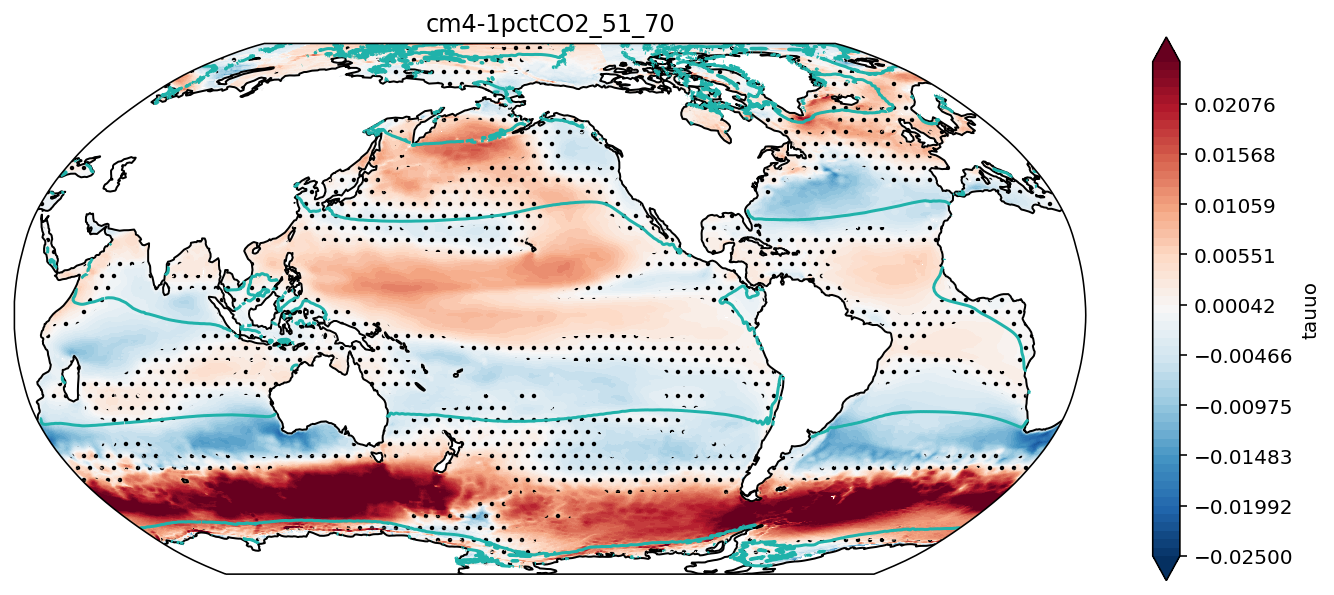

In [21]:
plot_globalmap_difference_taux(cm4_tauuo_diff,
                             cm4_1pctCO2_lt_1p64_std_tauuo,
                             cm4_piC_tauuo.sel(time=slice('0251-01-16','0500-12-16')).mean(dim='time'), 
                             'cm4-1pctCO2_51_70')

plt.savefig('cm4_tauuo_90_CI_1pctCO2.pdf')

/nbhome/Rebecca.Beadling/miniconda/envs/acc/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


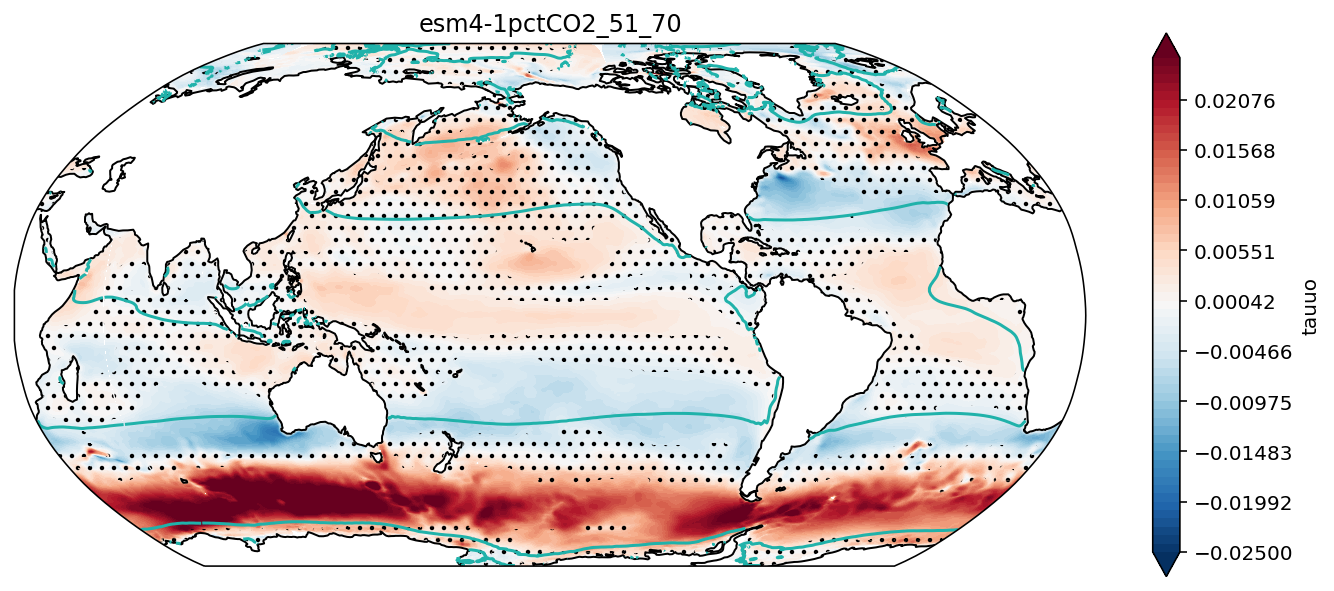

In [35]:
plot_globalmap_difference_taux(esm4_tauuo_diff,
                             esm4_1pctCO2_lt_1p64_std_tauuo,
                             esm4_piC_tauuo.sel(time=slice('0101-01-16','0400-12-16')).mean(dim='time'), 
                             'esm4-1pctCO2_51_70')

plt.savefig('esm4_tauuo_90_CI_1pctCO2.pdf')

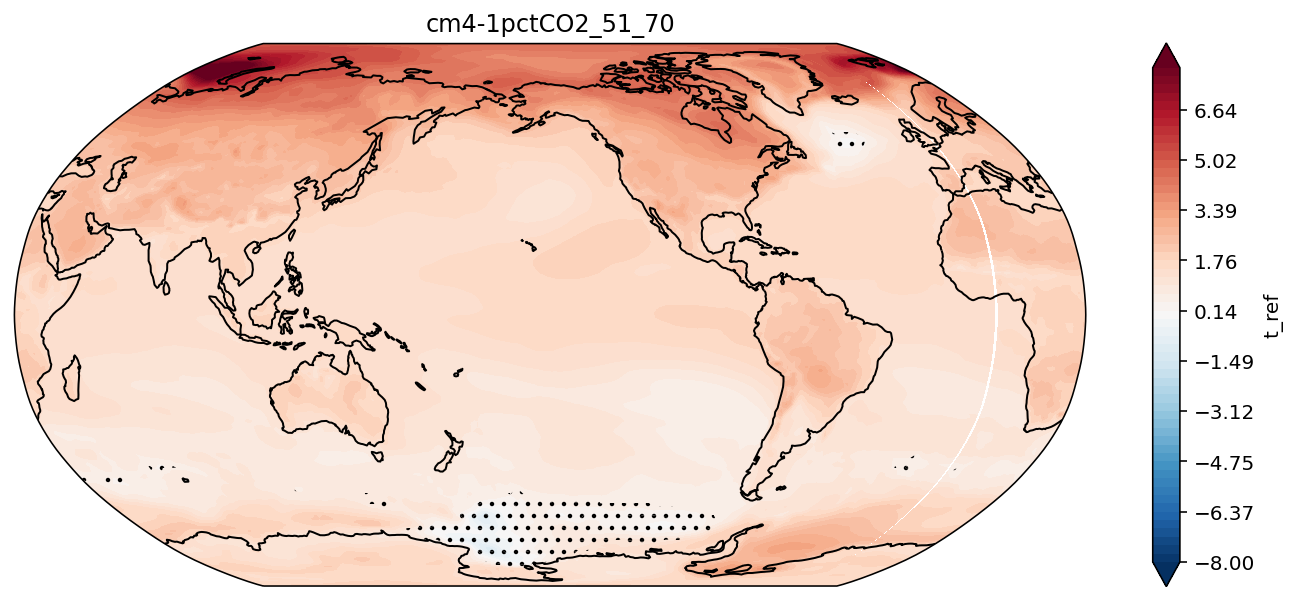

In [35]:
ax = plot_globalmap_difference_sat(cm4_t_ref_diff,
                               cm4_1pctCO2_lt_1p64_std_sat,
                               'cm4-1pctCO2_51_70')

plt.savefig('cm4_1pctCO2_sat_90_CI.pdf')

CPU times: user 14.4 s, sys: 3.04 s, total: 17.4 s
Wall time: 25.2 s


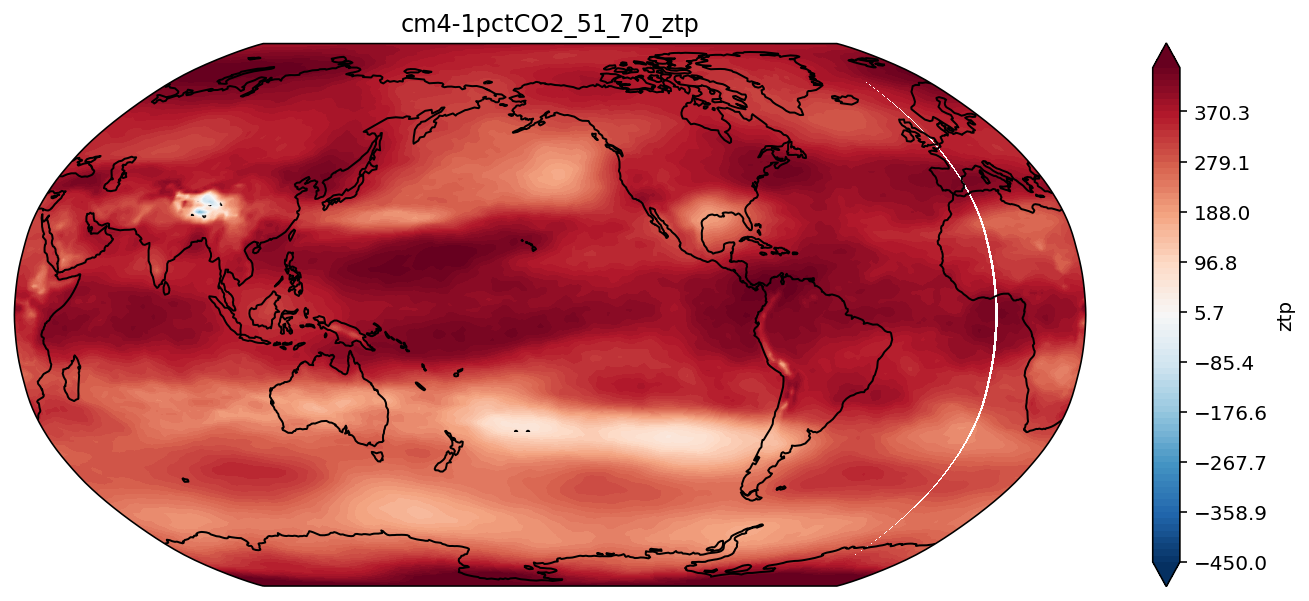

In [37]:
%%time
plot_globalmap_difference_ztp(cm4_ztp_diff,
                               cm4_1pctCO2_lt_1p64_std_ztp,
                               'cm4-1pctCO2_51_70_ztp')
plt.savefig('cm4_1pctCO2_ztp_90_CI.pdf')

/nbhome/Rebecca.Beadling/miniconda/envs/acc/lib/python3.9/site-packages/matplotlib/contour.py:1486: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/nbhome/Rebecca.Beadling/miniconda/envs/acc/lib/python3.9/site-packages/matplotlib/contour.py:1487: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


CPU times: user 1min 31s, sys: 1min 48s, total: 3min 20s
Wall time: 57.6 s


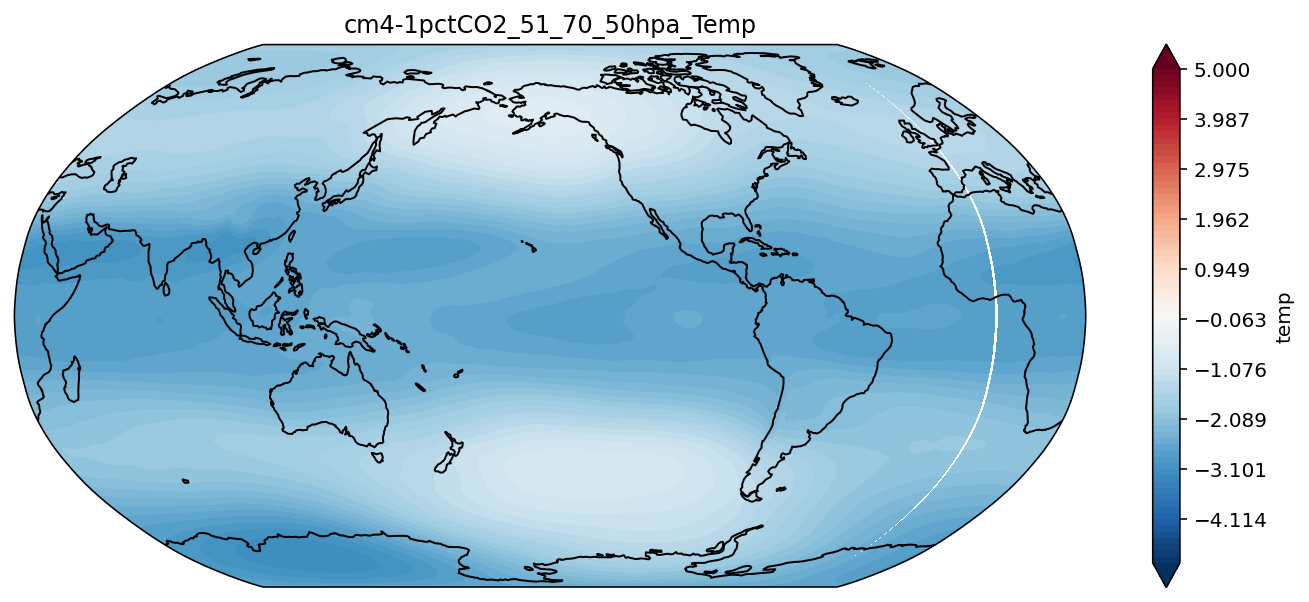

In [38]:
%%time
plot_globalmap_difference_temp(cm4_temp_diff.sel(pfull=50,method='nearest'),
                               cm4_1pctCO2_lt_1p64_std_temp.sel(pfull=50,method='nearest'),
                               'cm4-1pctCO2_51_70_50hpa_Temp')
plt.savefig('cm4_1pctCO2_50_hpa_90_CI.pdf')

CPU times: user 1min 34s, sys: 2min 2s, total: 3min 37s
Wall time: 47.6 s


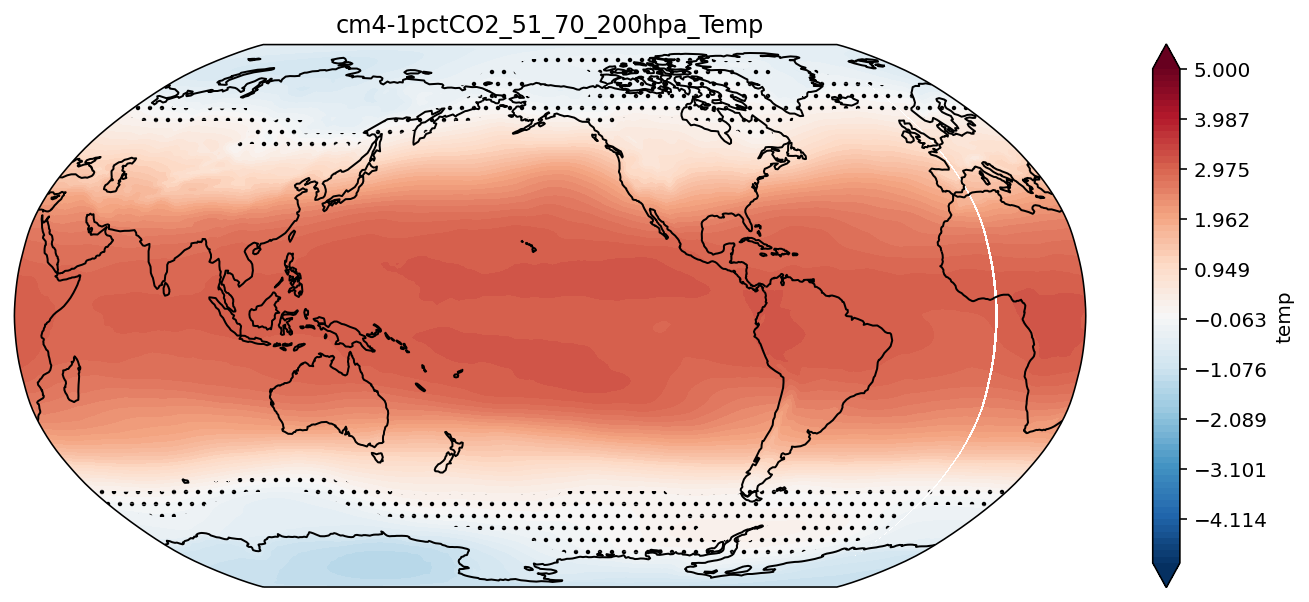

In [39]:
%%time
plot_globalmap_difference_temp(cm4_temp_diff.sel(pfull=200,method='nearest'),
                               cm4_1pctCO2_lt_1p64_std_temp.sel(pfull=200,method='nearest'),
                               'cm4-1pctCO2_51_70_200hpa_Temp')
plt.savefig('cm4_1pctCO2_200_hpa_90_CI.pdf')

### Zonal mean fields

In [77]:
### Compute the zonal mean of the piControl temperature and wind field field
### and then compute the 20 year rolling mean 
### and then the standard dev of the 20 year rolling means.

cm4_piC_temp_zm = cm4_piC_temp.temp.sel(time=slice('0251-01-16','0500-12-16')).mean(dim='lon')
cm4_piC_temp_zm_ann_20 = cm4_piC_temp_zm.rolling(time=20, center=True).mean()
cm4_piC_temp_zm_ann_20_std = cm4_piC_temp_zm_ann_20.std(dim='time')

esm4_piC_temp_zm = esm4_piC_temp.temp.sel(time=slice('0101-01-16','0400-12-16')).mean(dim='lon')
esm4_piC_temp_zm_ann_20 = esm4_piC_temp_zm.rolling(time=20, center=True).mean()
esm4_piC_temp_zm_ann_20_std = esm4_piC_temp_zm_ann_20.std(dim='time')


## u wind

cm4_piC_ucomp_zm = cm4_piC_ucomp.ucomp.sel(time=slice('0251-01-16','0500-12-16')).mean(dim='lon')
cm4_piC_ucomp_zm_ann_20 = cm4_piC_ucomp_zm.rolling(time=20, center=True).mean()
cm4_piC_ucomp_zm_ann_20_std = cm4_piC_ucomp_zm_ann_20.std(dim='time')

esm4_piC_ucomp_zm = esm4_piC_ucomp.ucomp.sel(time=slice('0101-01-16','0400-12-16')).mean(dim='lon')
esm4_piC_ucomp_zm_ann_20 = esm4_piC_ucomp_zm.rolling(time=20, center=True).mean()
esm4_piC_ucomp_zm_ann_20_std = esm4_piC_ucomp_zm_ann_20.std(dim='time')

In [78]:
## Compute the absolute differences (magnitude of deviation) from the piControl mean 
## zonal mean.

cm4_abs_diff_temp_zm_1pctCO2 = abs(cm4_temp_diff.mean(dim='lon'))
esm4_abs_diff_temp_zm_1pctCO2 = abs(esm4_temp_diff.mean(dim='lon'))

cm4_abs_diff_ucomp_zm_1pctCO2 = abs(cm4_ucomp_diff.mean(dim='lon'))
esm4_abs_diff_ucomp_zm_1pctCO2 = abs(esm4_ucomp_diff.mean(dim='lon'))

In [79]:
cm4_1pctCO2_lt_1p64_std_temp_zm = cm4_abs_diff_temp_zm_1pctCO2.where(cm4_abs_diff_temp_zm_1pctCO2<1.64*cm4_piC_temp_zm_ann_20_std)
esm4_1pctCO2_lt_1p64_std_temp_zm = esm4_abs_diff_temp_zm_1pctCO2.where(esm4_abs_diff_temp_zm_1pctCO2<1.64*esm4_piC_temp_zm_ann_20_std)

cm4_1pctCO2_lt_1p64_std_ucomp_zm = cm4_abs_diff_ucomp_zm_1pctCO2.where(cm4_abs_diff_ucomp_zm_1pctCO2<1.64*cm4_piC_ucomp_zm_ann_20_std)
esm4_1pctCO2_lt_1p64_std_ucomp_zm = esm4_abs_diff_ucomp_zm_1pctCO2.where(esm4_abs_diff_ucomp_zm_1pctCO2<1.64*esm4_piC_ucomp_zm_ann_20_std)

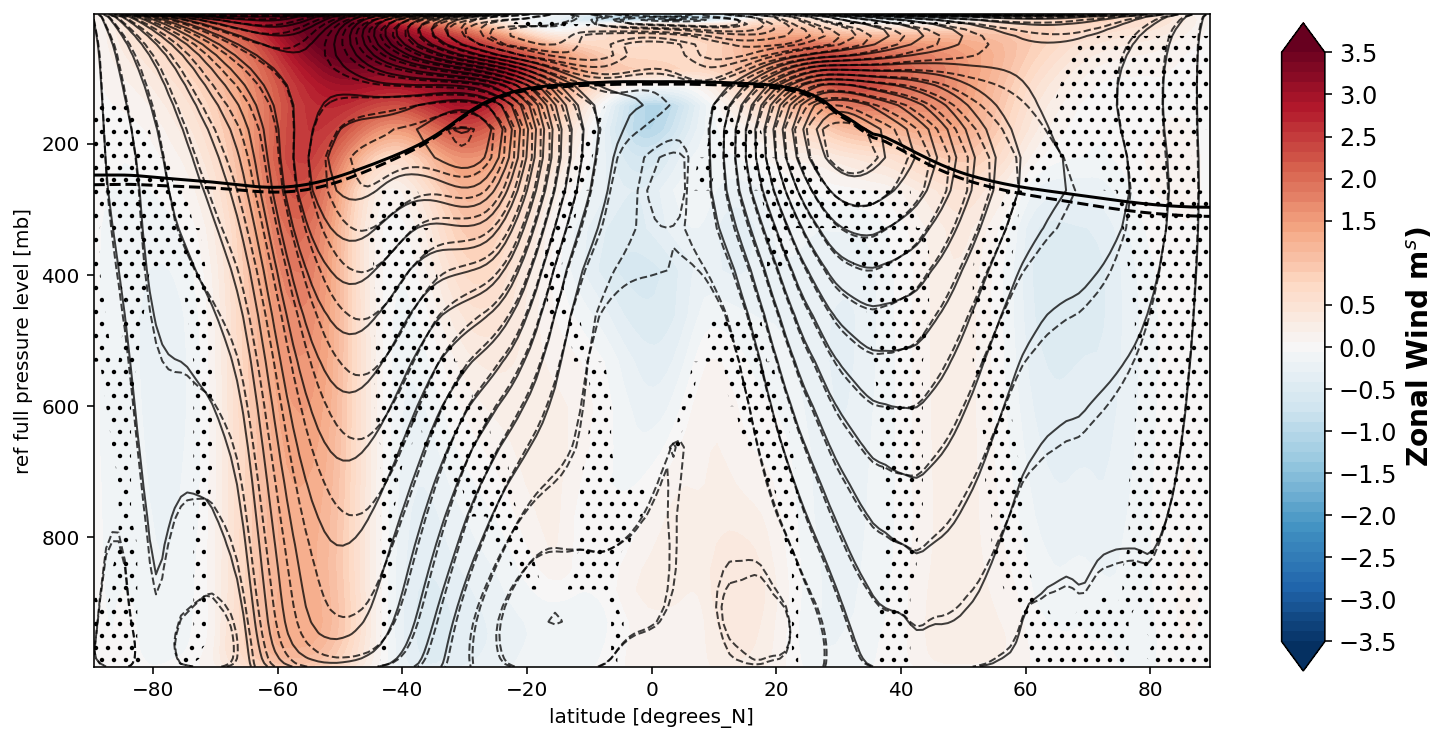

In [94]:
fig, ax0 = plt.subplots(figsize=(10,6))
## add custom colorbar for temp
cax_zm_u = fig.add_axes([0.95, 0.12, 0.03, 0.75])
cbar_zm_u = cm4_ucomp_diff.mean(dim='lon').plot.contourf(ax=ax0,yincrease=False,
                                             vmin=-3.5,vmax=3.5,
                                             cmap='RdBu_r', 
                                             extend='both',
                                             levels=60,
                                             add_colorbar=False)
cbr_zm_u = plt.colorbar(cbar_zm_u, cax=cax_zm_u, ticks=[-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,0,0.5,1.5,2.0,2.5,3.0,3.5], orientation="vertical")
cbr_zm_u.set_label(label='Zonal Wind m$^{s}$)', fontsize=14, weight='bold')
cbr_zm_u.ax.tick_params(labelsize='large')

## plots
cm4_ucomp_diff.mean(dim='lon').plot.contourf(ax=ax0,yincrease=False,
                                             vmin=-3.5,vmax=3.5,
                                             cmap='RdBu_r', 
                                             extend='both',
                                             levels=60,
                                             add_colorbar=False)
(cm4_1pctCO2_ptp.ptp.mean(dim='lon').sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')*0.01).plot(color='k',ax=ax0,
                                      linestyle='-',yincrease=False)

(cm4_piC_ptp.ptp.mean(dim='lon').sel(time=slice('0251-01-16','0500-12-16')).mean(dim='time')*0.01).plot(color='k',ax=ax0,
                                      linestyle='--',yincrease=False)

## hatches
cm4_1pctCO2_lt_1p64_std_ucomp_zm.plot.contourf(ax=ax0, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,
                                        yincrease=False)

### add mean-state contours over
cm4_piC_ucomp_zm.mean(dim='time').plot.contour(ax=ax0,yincrease=False,
                                                              levels=30, 
                                                              vmin=-36, 
                                                              vmax=36,
                                                              colors='k',
                                                              linewidths=1,alpha=0.75,linestyles='--'
                                                              )

cm4_1pctCO2_ucomp.ucomp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim=['time','lon']).plot.contour(ax=ax0,yincrease=False,
                                                              levels=30, 
                                                              vmin=-36, 
                                                              vmax=36,
                                                              colors='k',
                                                              linewidths=1,alpha=0.75
                                                              )
plt.savefig('cm4_zm_ucomp_1pctCO2_90_CI.pdf',dpi=600)


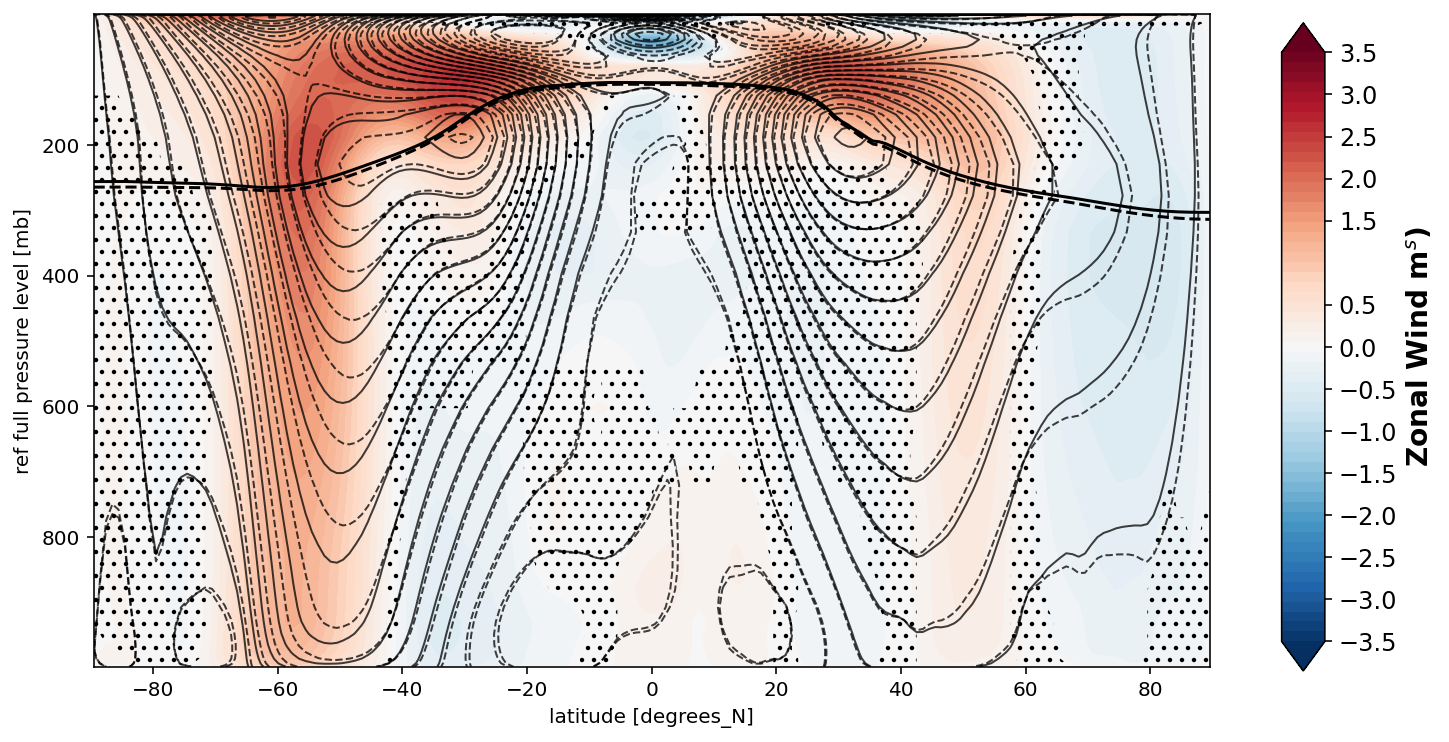

In [95]:
fig, ax0 = plt.subplots(figsize=(10,6))
## add custom colorbar for temp
cax_zm_u = fig.add_axes([0.95, 0.12, 0.03, 0.75])
cbar_zm_u = esm4_ucomp_diff.mean(dim='lon').plot.contourf(ax=ax0,yincrease=False,
                                             vmin=-3.5,vmax=3.5,
                                             cmap='RdBu_r', 
                                             extend='both',
                                             levels=60,
                                             add_colorbar=False)
cbr_zm_u = plt.colorbar(cbar_zm_u, cax=cax_zm_u, ticks=[-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,0,0.5,1.5,2.0,2.5,3.0,3.5], orientation="vertical")
cbr_zm_u.set_label(label='Zonal Wind m$^{s}$)', fontsize=14, weight='bold')
cbr_zm_u.ax.tick_params(labelsize='large')

## plots
esm4_ucomp_diff.mean(dim='lon').plot.contourf(ax=ax0,yincrease=False,
                                             vmin=-3.5,vmax=3.5,
                                             cmap='RdBu_r', 
                                             extend='both',
                                             levels=60,
                                             add_colorbar=False)
(esm4_1pctCO2_ptp.ptp.mean(dim='lon').sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')*0.01).plot(color='k',ax=ax0,
                                      linestyle='-',yincrease=False)

(esm4_piC_ptp.ptp.mean(dim='lon').sel(time=slice('0101-01-16','0400-12-16')).mean(dim='time')*0.01).plot(color='k',ax=ax0,
                                      linestyle='--',yincrease=False)

## hatches
esm4_1pctCO2_lt_1p64_std_ucomp_zm.plot.contourf(ax=ax0, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,
                                        yincrease=False)

### add mean-state contours over
esm4_piC_ucomp_zm.mean(dim='time').plot.contour(ax=ax0,yincrease=False,
                                                              levels=30, 
                                                              vmin=-36, 
                                                              vmax=36,
                                                              colors='k',
                                                              linewidths=1,alpha=0.75,linestyles='--'
                                                              )

esm4_1pctCO2_ucomp.ucomp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim=['time','lon']).plot.contour(ax=ax0,yincrease=False,
                                                              levels=30, 
                                                              vmin=-36, 
                                                              vmax=36,
                                                              colors='k',
                                                              linewidths=1,alpha=0.75
                                                              )
plt.savefig('esm4_zm_ucomp_1pctCO2_90_CI.pdf',dpi=600)


In [86]:
cm4_piC_ucomp_zm

<xarray.DataArray 'ucomp' (time: 250, pfull: 33, lat: 180)>
dask.array<mean_agg-aggregate, shape=(250, 33, 180), dtype=float32, chunksize=(5, 33, 180), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * pfull    (pfull) float64 2.164 5.845 10.75 17.11 ... 975.6 985.4 992.8 997.9
  * time     (time) object 0251-07-02 12:00:00 ... 0500-07-02 12:00:00

CPU times: user 12.5 s, sys: 8.23 s, total: 20.7 s
Wall time: 11.3 s


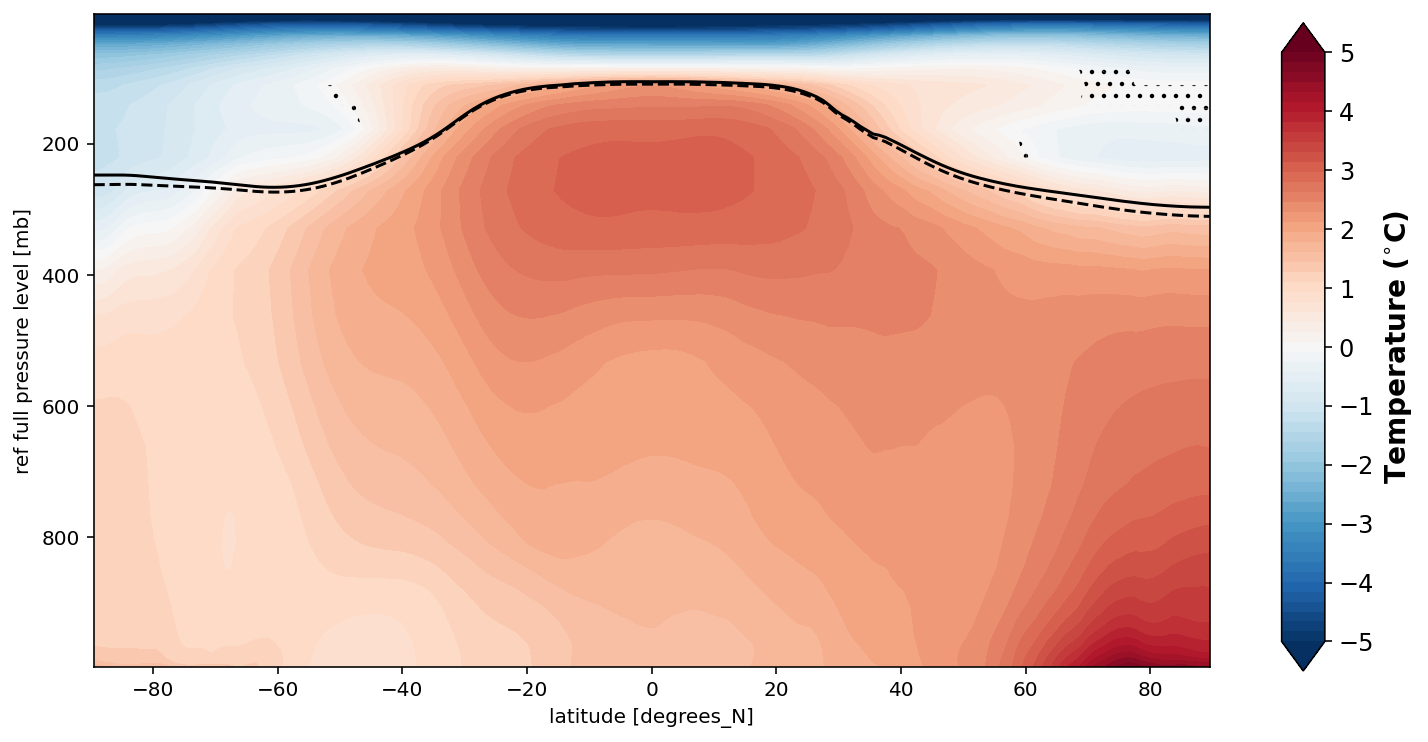

In [73]:
%%time

fig, ax0 = plt.subplots(figsize=(10,6))
## add custom colorbar for temp
cax_zm_temp = fig.add_axes([0.95, 0.12, 0.03, 0.75])
cbar_zm_temp = cm4_temp_diff.mean(dim='lon').plot.contourf(ax=ax0,yincrease=False,
                                             vmin=-5,vmax=5,
                                             cmap='RdBu_r', 
                                             extend='both',
                                             levels=60,
                                             add_colorbar=False)
cbr_zm_temp = plt.colorbar(cbar_zm_temp, cax=cax_zm_temp, ticks=[-5,-4,-3,-2,-1,0,1,2,3,4,5], orientation="vertical")
cbr_zm_temp.set_label(label='Temperature ($^{\circ}$C)', fontsize=14, weight='bold')
cbr_zm_temp.ax.tick_params(labelsize='large')


## plots
cm4_temp_diff.mean(dim='lon').plot.contourf(ax=ax0,yincrease=False,
                                             vmin=-5,vmax=5,
                                             cmap='RdBu_r', 
                                             extend='both',levels=60,add_colorbar=False)

(cm4_1pctCO2_ptp.ptp.mean(dim='lon').sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')*0.01).plot(color='k',ax=ax0,
                                      linestyle='-',yincrease=False)

(cm4_piC_ptp.ptp.mean(dim='lon').sel(time=slice('0251-01-16','0500-12-16')).mean(dim='time')*0.01).plot(color='k',ax=ax0,
                                      linestyle='--',yincrease=False)

## hatches
cm4_1pctCO2_lt_1p64_std_temp_zm.plot.contourf(ax=ax0, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,
                                        yincrease=False)



plt.savefig('cm4_zm_temp_1pctCO2_90_CI.pdf',dpi=600)


In [ ]:
%%time

fig, ax0 = plt.subplots(figsize=(10,6))
## add custom colorbar for temp
cax_zm_temp = fig.add_axes([0.95, 0.12, 0.03, 0.75])
cbar_zm_temp = esm4_temp_diff.mean(dim='lon').plot.contourf(ax=ax0,yincrease=False,
                                             vmin=-5,vmax=5,
                                             cmap='RdBu_r', 
                                             extend='both',
                                             levels=60,
                                             add_colorbar=False)
cbr_zm_temp = plt.colorbar(cbar_zm_temp, cax=cax_zm_temp, ticks=[-5,-4,-3,-2,-1,0,1,2,3,4,5], orientation="vertical")
cbr_zm_temp.set_label(label='Temperature ($^{\circ}$C)', fontsize=14, weight='bold')
cbr_zm_temp.ax.tick_params(labelsize='large')


## plots
esm4_temp_diff.mean(dim='lon').plot.contourf(ax=ax0,yincrease=False,
                                             vmin=-5,vmax=5,
                                             cmap='RdBu_r', 
                                             extend='both',levels=60,add_colorbar=False)

(esm4_1pctCO2_ptp.ptp.mean(dim='lon').sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')*0.01).plot(color='k',ax=ax0,
                                      linestyle='-',yincrease=False)

(esm4_piC_ptp.ptp.mean(dim='lon').sel(time=slice('0251-01-16','0500-12-16')).mean(dim='time')*0.01).plot(color='k',ax=ax0,
                                      linestyle='--',yincrease=False)


esm4_1pctCO2_lt_1p64_std_temp_zm.plot.contourf(ax=ax0, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,
                                        yincrease=False)



plt.savefig('esm4_zm_temp_1pctCO2_90_CI.pdf',dpi=600)


### Figure S9 all plots together -- note the error of the unit lable on the WVP panel. This was corrected in the publication, it should be (kg / m2).

CPU times: user 3min 7s, sys: 21 s, total: 3min 28s
Wall time: 4min 36s


Text(0.5, 1.0, '')

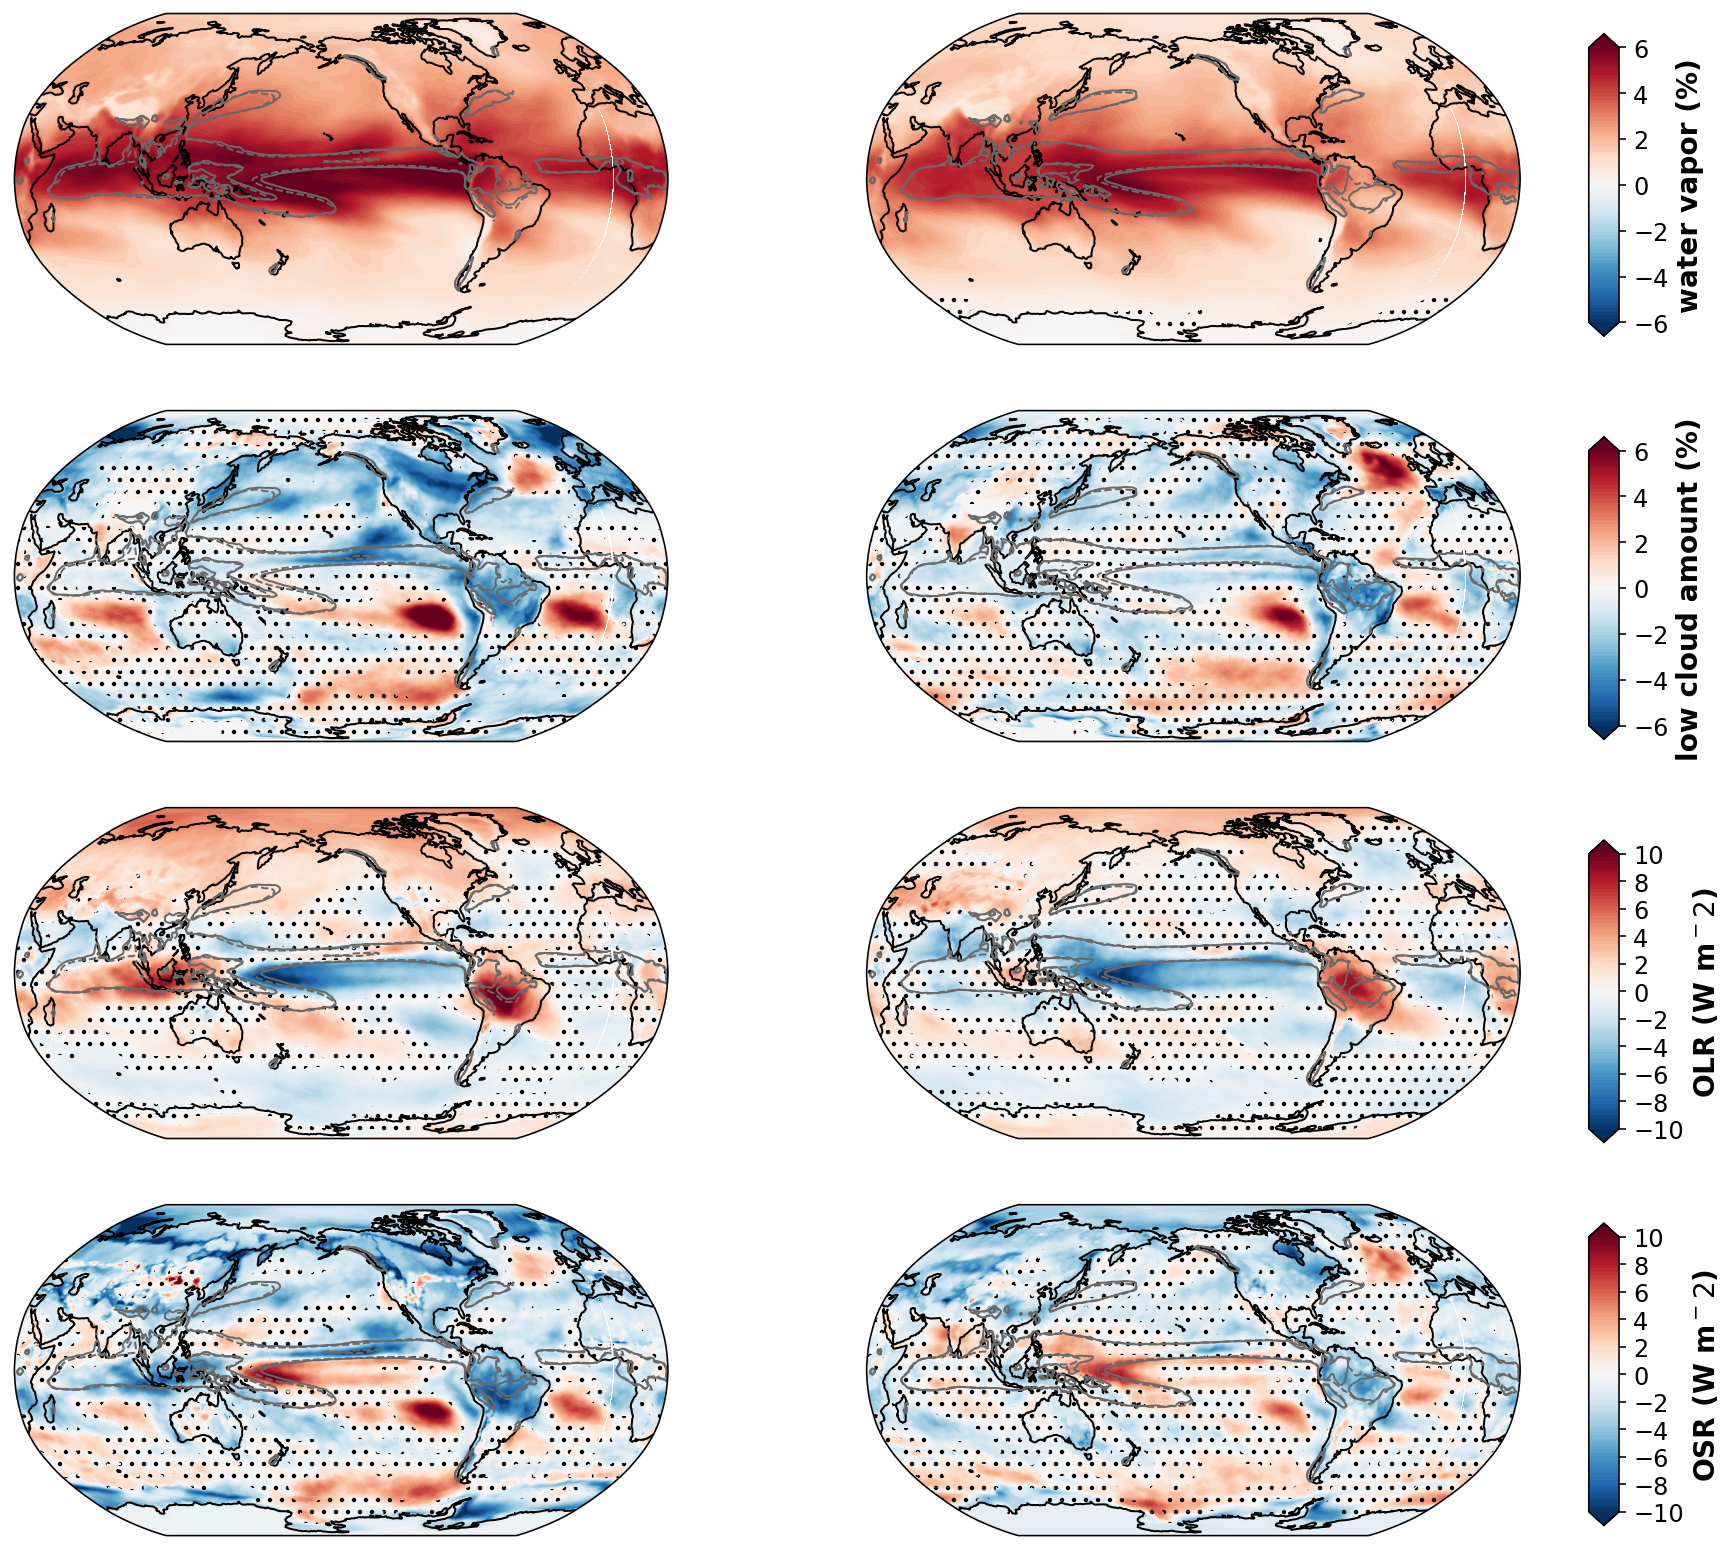

In [37]:
%%time
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5),(ax6,ax7)) = plt.subplots(ncols=2,
                                nrows=4,
                                figsize=(14,14),
                                subplot_kw={'projection': ccrs.Robinson(central_longitude=(-150))})
#### colorbars

## add custom colorbars -- wvp
cax_wvp = fig.add_axes([0.92, 0.72, 0.015, 0.15])
cbar_wvp = cm4_WVP_diff.plot.contourf(ax=ax0,
        transform=ccrs.PlateCarree(),
        vmin=-6,vmax=6, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
cbr_wvp = plt.colorbar(cbar_wvp, cax=cax_wvp, ticks=[-6,-4,-2,0,2,4,6], orientation="vertical")
cbr_wvp.set_label(label='water vapor (%)', fontsize=14, weight='bold')
cbr_wvp.ax.tick_params(labelsize='large')

## add custom colorbars -- wvp
## add custom colorbars -- low cloud
cax_low_cld = fig.add_axes([0.92, 0.52, 0.015, 0.15])
cbar_low_cld = cm4_low_cld_diff.plot.contourf(ax=ax2,
        transform=ccrs.PlateCarree(),
        vmin=-6,vmax=6, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
cbr_low_cld = plt.colorbar(cbar_low_cld, cax=cax_low_cld, ticks=[-6,-4,-2,0,2,4,6], orientation="vertical")
cbr_low_cld.set_label(label='low cloud amount (%)', fontsize=14, weight='bold')
cbr_low_cld.ax.tick_params(labelsize='large')

## add custom colorbars -- TOA OLR
cax_olr = fig.add_axes([0.92, 0.32, 0.015, 0.15])
cbar_olr = cm4_olr_diff.plot.contourf(ax=ax4,
        transform=ccrs.PlateCarree(),
        vmin=-10,vmax=10, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
cbr_olr = plt.colorbar(cbar_olr, cax=cax_olr, ticks=[-10,-8,-6,-4,-2,0,2,4,6,8,10], orientation="vertical")
cbr_olr.set_label(label='OLR (W m${^-2}$)', fontsize=14, weight='bold')
cbr_olr.ax.tick_params(labelsize='large')

## add custom colorbars -- TOA OSW
cax_swup_toa = fig.add_axes([0.92, 0.13, 0.015, 0.15])
cbar_swup_toa = cm4_swup_toa_diff.plot.contourf(ax=ax6,
        transform=ccrs.PlateCarree(),
        vmin=-10,vmax=10, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
cbr_swup_toa = plt.colorbar(cbar_swup_toa, cax=cax_swup_toa, ticks=[-10,-8,-6,-4,-2,0,2,4,6,8,10], orientation="vertical")
cbr_swup_toa.set_label(label='OSR (W m${^-2}$)', fontsize=14, weight='bold')
cbr_swup_toa.ax.tick_params(labelsize='large')

######### CM4 results

## wvp
cm4_WVP_diff.plot.contourf(ax=ax0,
        transform=ccrs.PlateCarree(),
        vmin=-6,vmax=6, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)

cm4_piC_precip.precip.sel(time=slice('0251-01-16','0500-12-16')).mean(dim='time').plot.contour(ax=ax0,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, 
        colors='dimgrey',extend='both',linestyles='--',linewidths=1,
    )
    
cm4_1pctCO2_precip.precip.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot.contour(ax=ax0,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, linewidths=1,
        colors='dimgrey',extend='both'
    )
    
cm4_1pctCO2_lt_1p64_std_WVP.plot.contourf(ax=ax0, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())

## low cld
cm4_low_cld_diff.plot.contourf(ax=ax2,
        transform=ccrs.PlateCarree(),
        vmin=-6,vmax=6, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)

cm4_piC_precip.precip.sel(time=slice('0251-01-16','0500-12-16')).mean(dim='time').plot.contour(ax=ax2,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, 
        colors='dimgrey',extend='both',linestyles='--',linewidths=1,
    )
    
cm4_1pctCO2_precip.precip.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot.contour(ax=ax2,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, linewidths=1,
        colors='dimgrey',extend='both'
    )
    
cm4_1pctCO2_lt_1p64_std_low_cld.plot.contourf(ax=ax2, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())


## olr
cm4_olr_diff.plot.contourf(ax=ax4,
        transform=ccrs.PlateCarree(),
        vmin=-10,vmax=10, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)

cm4_piC_precip.precip.sel(time=slice('0251-01-16','0500-12-16')).mean(dim='time').plot.contour(ax=ax4,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, 
        colors='dimgrey',extend='both',linestyles='--',linewidths=1,
    )
    
cm4_1pctCO2_precip.precip.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot.contour(ax=ax4,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, linewidths=1,
        colors='dimgrey',extend='both'
    )
    
cm4_1pctCO2_lt_1p64_std_olr.plot.contourf(ax=ax4, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())


## osw
cm4_swup_toa_diff.plot.contourf(ax=ax6,
        transform=ccrs.PlateCarree(),
        vmin=-10,vmax=10, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)

cm4_piC_precip.precip.sel(time=slice('0251-01-16','0500-12-16')).mean(dim='time').plot.contour(ax=ax6,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, 
        colors='dimgrey',extend='both',linestyles='--',linewidths=1,
    )
    
cm4_1pctCO2_precip.precip.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot.contour(ax=ax6,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, linewidths=1,
        colors='dimgrey',extend='both'
    )
    
cm4_1pctCO2_lt_1p64_std_swup_toa.plot.contourf(ax=ax6, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())


######## ESM4 results

## wvp
esm4_WVP_diff.plot.contourf(ax=ax1,
        transform=ccrs.PlateCarree(),
        vmin=-6,vmax=6, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)

esm4_piC_precip.precip.sel(time=slice('0101-01-16','0400-12-16')).mean(dim='time').plot.contour(ax=ax1,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, 
        colors='dimgrey',extend='both',linestyles='--',linewidths=1,
    )
    
esm4_1pctCO2_precip.precip.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot.contour(ax=ax1,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, linewidths=1,
        colors='dimgrey',extend='both'
    )
    
esm4_1pctCO2_lt_1p64_std_WVP.plot.contourf(ax=ax1, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())

## low cld
esm4_low_cld_diff.plot.contourf(ax=ax3,
        transform=ccrs.PlateCarree(),
        vmin=-6,vmax=6, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)

esm4_piC_precip.precip.sel(time=slice('0101-01-16','0400-12-16')).mean(dim='time').plot.contour(ax=ax3,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, 
        colors='dimgrey',extend='both',linestyles='--',linewidths=1,
    )
    
esm4_1pctCO2_precip.precip.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot.contour(ax=ax3,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, linewidths=1,
        colors='dimgrey',extend='both'
    )
    
esm4_1pctCO2_lt_1p64_std_low_cld.plot.contourf(ax=ax3, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())


## olr
esm4_olr_diff.plot.contourf(ax=ax5,
        transform=ccrs.PlateCarree(),
        vmin=-10,vmax=10, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)

esm4_piC_precip.precip.sel(time=slice('0101-01-16','0400-12-16')).mean(dim='time').plot.contour(ax=ax5,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, 
        colors='dimgrey',extend='both',linestyles='--',linewidths=1,
    )
    
esm4_1pctCO2_precip.precip.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot.contour(ax=ax5,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, linewidths=1,
        colors='dimgrey',extend='both'
    )
    
esm4_1pctCO2_lt_1p64_std_olr.plot.contourf(ax=ax5, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())


## osw
esm4_swup_toa_diff.plot.contourf(ax=ax7,
        transform=ccrs.PlateCarree(),
        vmin=-10,vmax=10, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)

esm4_piC_precip.precip.sel(time=slice('0101-01-16','0400-12-16')).mean(dim='time').plot.contour(ax=ax7,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, 
        colors='dimgrey',extend='both',linestyles='--',linewidths=1,
    )
    
esm4_1pctCO2_precip.precip.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time').plot.contour(ax=ax7,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, linewidths=1,
        colors='dimgrey',extend='both'
    )
    
esm4_1pctCO2_lt_1p64_std_swup_toa.plot.contourf(ax=ax7, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())



#### add details
ax0.axes.coastlines()
ax1.axes.coastlines()
ax2.axes.coastlines()
ax3.axes.coastlines()
ax4.axes.coastlines()
ax5.axes.coastlines()
ax6.axes.coastlines()
ax7.axes.coastlines()

ax0.set_title('')
ax1.set_title('')
ax2.set_title('')
ax3.set_title('')
ax4.set_title('')
ax5.set_title('')
ax6.set_title('')
ax7.set_title('')